# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from src.data_cleaner import cleaner, geo_cleaner

# Loading and cleaning dataset

In [2]:
data = pd.read_csv("./data/alcohol-consumption.csv")
data = cleaner(data)
data.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,dominant_alcohol
0,Albania,7.5,5.0,2.5,34.3,26.5,37.6,1.7,Spirits
1,Andorra,11.3,10.1,1.6,34.1,42.0,23.9,0.0,Wine
2,Armenia,5.5,3.8,1.7,10.6,7.0,82.3,0.1,Spirits
3,Austria,11.6,11.4,0.4,53.5,31.6,14.9,0.0,Beer
4,Azerbaijan,0.8,0.5,0.3,61.5,36.9,0.0,1.5,Beer


# Generating plots

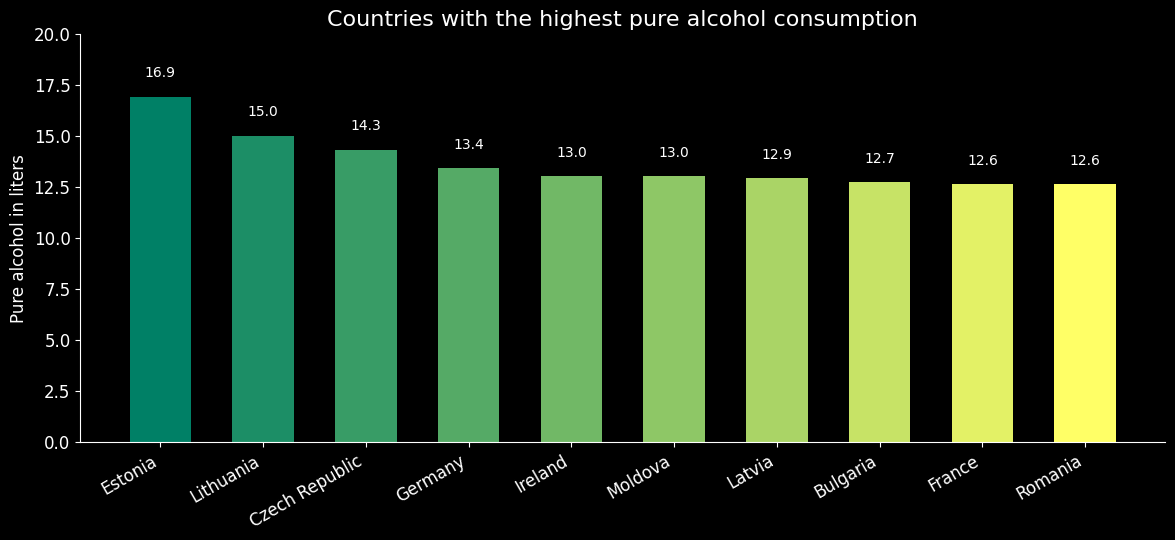

In [3]:
sorted_by_alcohol_high = data.sort_values(by='total_consumption', ascending=False)
x = sorted_by_alcohol_high['country'].head(10)
y = sorted_by_alcohol_high['total_consumption'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.summer  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 20))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 1, f"{liters:.1f}", ha="center")

ax.set_title("Countries with the highest pure alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Pure alcohol in liters", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

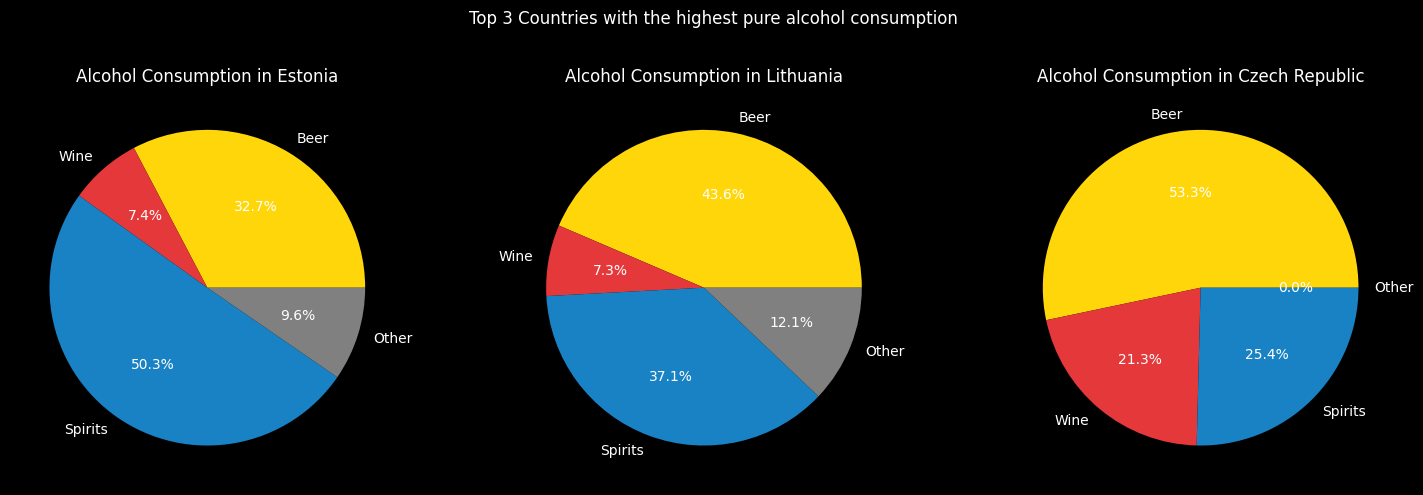

In [4]:


top_3_countries = data.sort_values(by='total_consumption', ascending=False).head(3)
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
colors = ["#ffd60a", "#e5383b", "#1982c4", "#808080"]

for i, country in enumerate(top_3_countries['country']):
    
    country_data = data[data['country'] == country]
    consumption_data = country_data[[ 
                                     'beer_percentage', 'wine_percentage', 
                                     'spirits_percentage', 'other_percentage']].values.flatten()
    ax[i].pie(consumption_data, 
              labels=['Beer', 'Wine', 'Spirits', 'Other'], 
              autopct='%1.1f%%', 
              colors=colors)
    ax[i].set_title(f"Alcohol Consumption in {country}")

fig.suptitle("Top 3 Countries with the highest pure alcohol consumption\n\n")
plt.tight_layout()
plt.show()


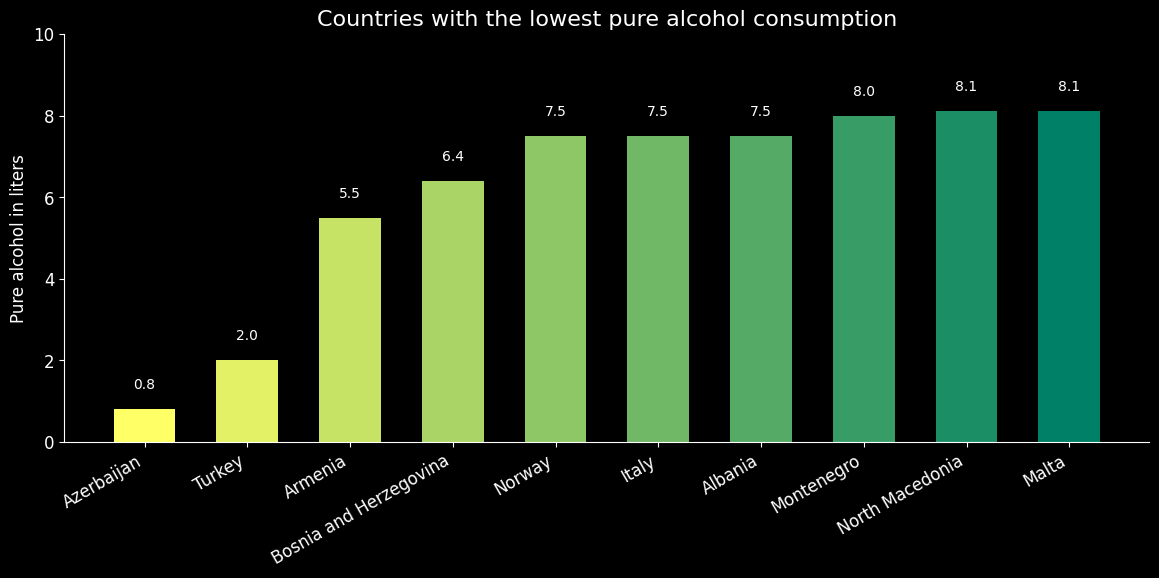

In [5]:
sorted_by_alcohol_low = data.sort_values(by='total_consumption')
x = sorted_by_alcohol_low['country'].head(10)
y = sorted_by_alcohol_low['total_consumption'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.summer_r  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 10))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 0.5, f"{liters:.1f}", ha="center")

ax.set_title("Countries with the lowest pure alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Pure alcohol in liters", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

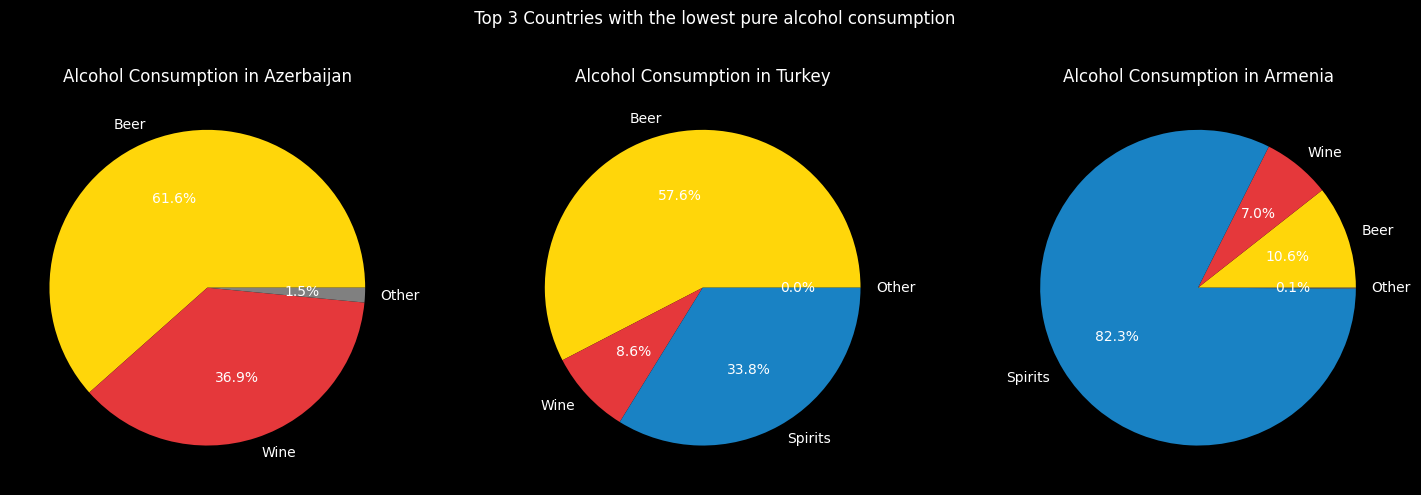

In [6]:
low_3_countries = data.sort_values(by='total_consumption').head(3)
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
colors = ["#ffd60a", "#e5383b", "#1982c4", "#808080"]

for i, country in enumerate(low_3_countries['country']):
    
    country_data = data[data['country'] == country]
    consumption_data = country_data[[ 
                                     'beer_percentage', 'wine_percentage', 
                                     'spirits_percentage', 'other_percentage']].values.flatten()
    

    if country_data['spirits_percentage'].values[0] == 0:
        new_consumption_data = country_data[[ 
                                     'beer_percentage', 'wine_percentage', 
                                     'other_percentage']].values.flatten()
        new_colors = ["#ffd60a", "#e5383b", "#808080"]
        ax[i].pie(new_consumption_data, 
              labels=['Beer', 'Wine', 'Other'], 
              autopct='%1.1f%%', 
              colors=new_colors)
        ax[i].set_title(f"Alcohol Consumption in {country}")
        continue
   
    ax[i].pie(consumption_data, 
              labels=['Beer', 'Wine', 'Spirits', 'Other'], 
              autopct='%1.1f%%', 
              colors=colors
              
              )
    ax[i].set_title(f"Alcohol Consumption in {country}")

fig.suptitle(" Top 3 Countries with the lowest pure alcohol consumption\n\n")
plt.tight_layout()
plt.show()

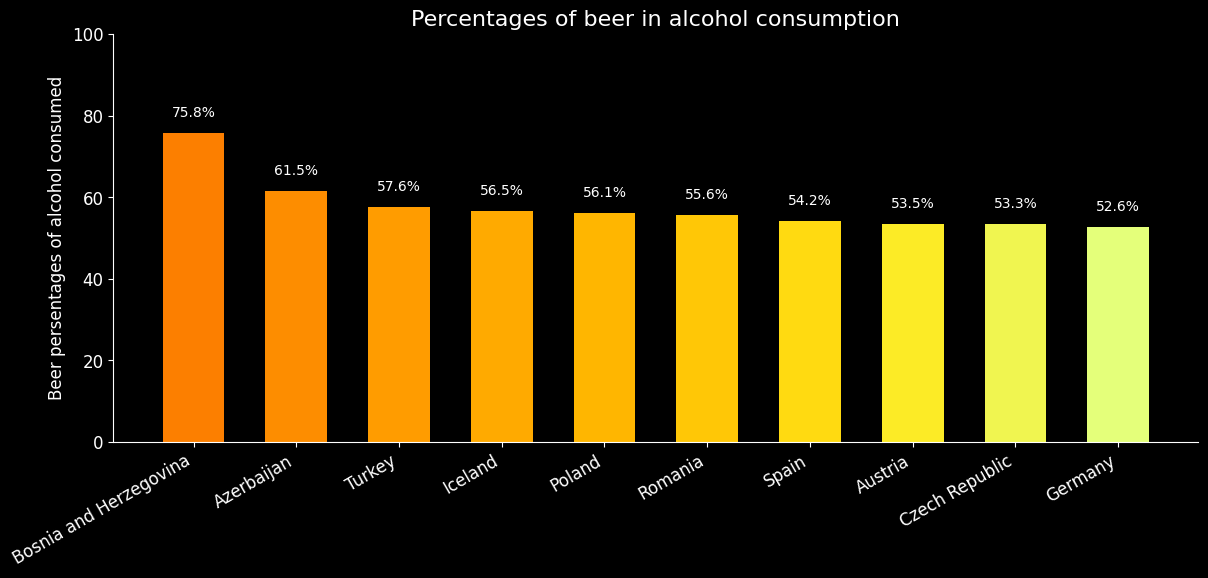

In [7]:
sorted_by_beer = data.sort_values(by='beer_percentage', ascending=False)
x = sorted_by_beer['country'].head(10)
y = sorted_by_beer['beer_percentage'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.Wistia_r  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 100))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 5, f"{liters}%", ha="center", va="center")

ax.set_title("Percentages of beer in alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Beer persentages of alcohol consumed", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

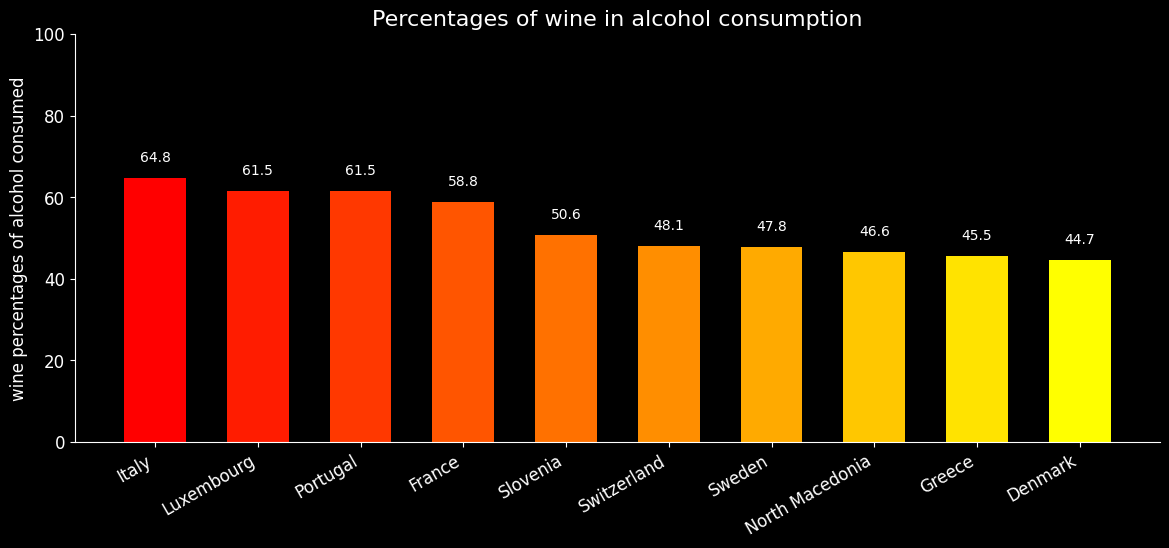

In [8]:
sorted_by_wine = data.sort_values(by='wine_percentage', ascending=False)
x = sorted_by_wine['country'].head(10)
y = sorted_by_wine['wine_percentage'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.autumn  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 100))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 5, f"{liters}", ha="center", va="center")

ax.set_title("Percentages of wine in alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("wine percentages of alcohol consumed", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

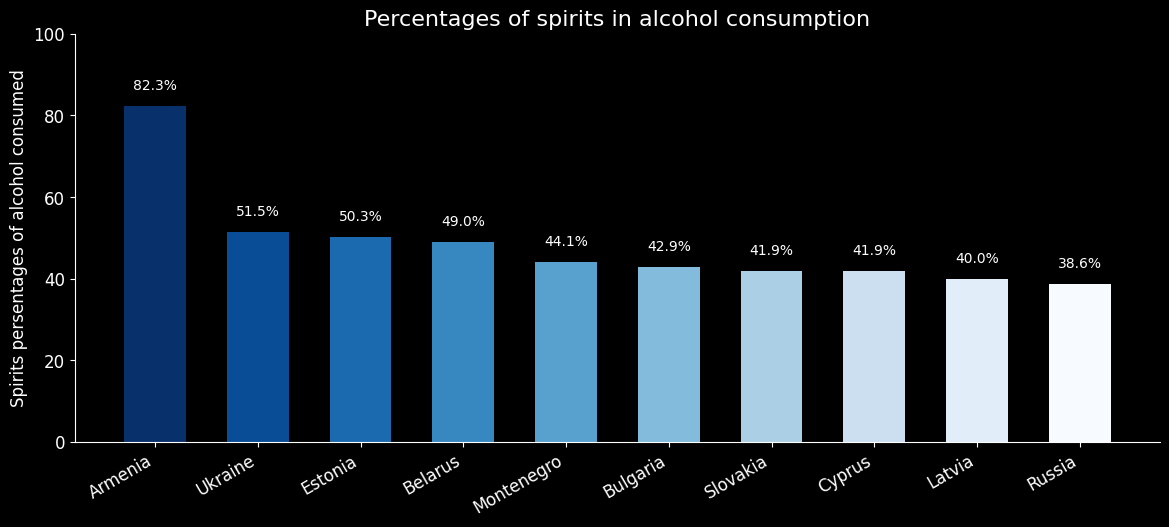

In [9]:
sorted_by_spirits = data.sort_values(by='spirits_percentage', ascending=False)
x = sorted_by_spirits['country'].head(10)
y = sorted_by_spirits['spirits_percentage'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.Blues_r  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 100))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 5, f"{liters}%", ha="center", va="center")

ax.set_title("Percentages of spirits in alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Spirits persentages of alcohol consumed", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

# Loading and cleaning geojson file

In [ ]:
geodata = gpd.read_file("./data/europe.geojson")

geodata = geo_cleaner(geodata)
geodata.head()

,country,geometry
0,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1..."
1,Andorra,"POLYGON ((1.78172 42.56996, 1.77472 42.57111, ..."
2,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
3,Austria,"POLYGON ((13.83361 48.7736, 13.85806 48.77055,..."
4,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."


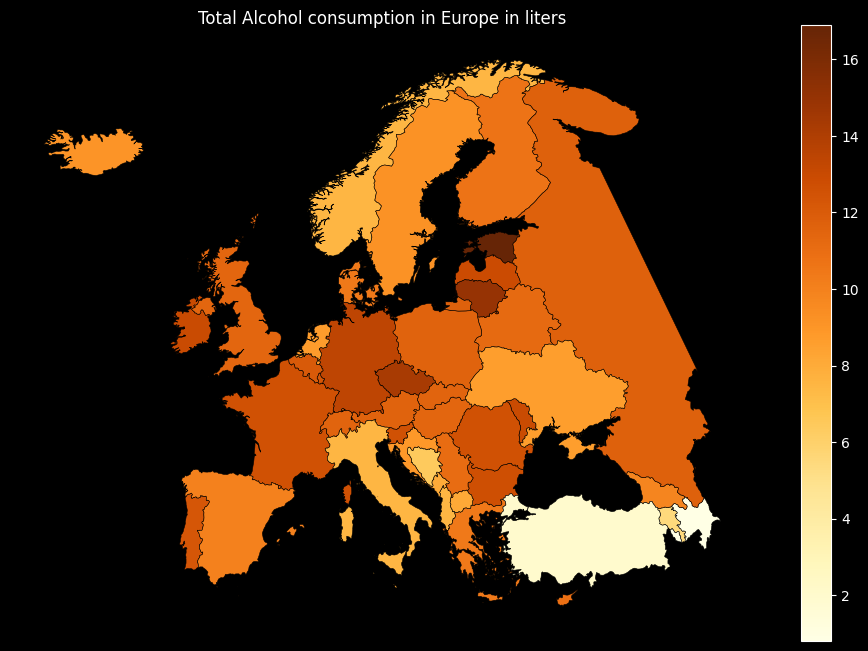

In [26]:

merged_data = geodata.merge(data, on='country', how='inner')
merged_data.head()
fig, ax = plt.subplots(figsize=(12,8))
merged_data.plot(column='total_consumption', cmap='YlOrBr', legend=True, ax=ax,edgecolors ='black',linewidth=0.4)
ax.set_title("Total Alcohol consumption in Europe in liters")
plt.axis('off')
plt.show()

In [18]:
color_map = {
    'Beer': '#ffd60a',
    'Wine': '#e5383b',
    'Spirits': '#1982c4'
}

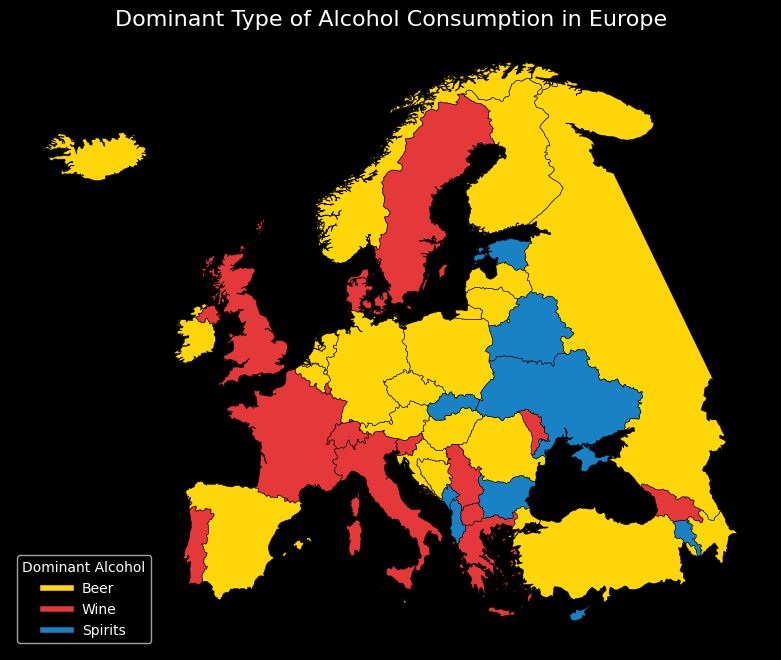

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

merged_data.plot(color=merged_data['dominant_alcohol'].map(color_map), legend=True, ax=ax, edgecolor='black', linewidth=0.4)

legend_labels = [
    plt.Line2D([0], [0], color='#ffd60a', lw=4, label='Beer'),
    plt.Line2D([0], [0], color='#e5383b', lw=4, label='Wine'),
    plt.Line2D([0], [0], color='#1982c4', lw=4, label='Spirits')
]
ax.legend(handles=legend_labels, title='Dominant Alcohol', loc='lower left')

ax.set_title("Dominant Type of Alcohol Consumption in Europe", fontsize=16)
plt.axis('off')
plt.show()

In [20]:
total_beer_percentage = data['beer_percentage'].sum()
total_wine_percentage = data['wine_percentage'].sum()
total_spirits_percentage = data['spirits_percentage'].sum()

alcohol_data = {
    'Beer': total_beer_percentage,
    'Wine': total_wine_percentage,
    'Spirits': total_spirits_percentage
}

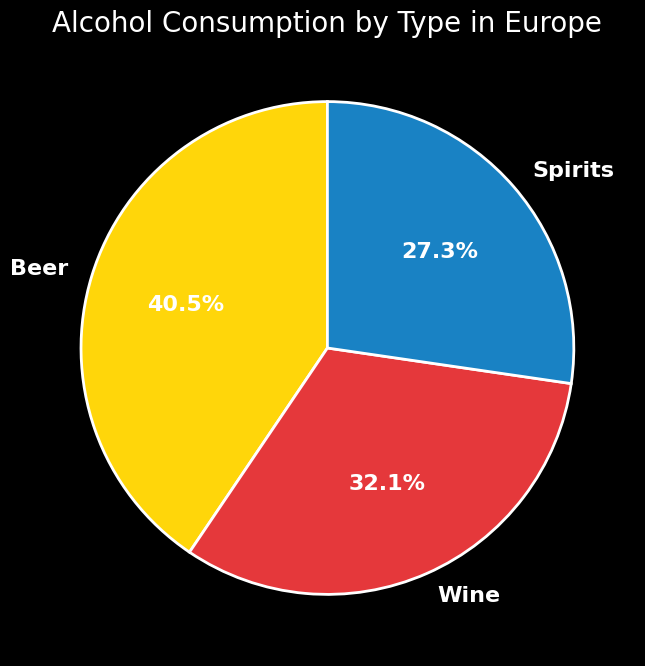

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(alcohol_data.values(),
       labels=alcohol_data.keys(),
       autopct='%1.1f%%', startangle=90,
       colors=['#ffd60a', '#e5383b', '#1982c4'],
       textprops={'fontsize': 16, 'fontweight': 'bold'},
       wedgeprops={'edgecolor': 'white', 'linewidth': 2}
    )

ax.set_title("Alcohol Consumption by Type in Europe", fontsize=20)
plt.show()